# TP4 EXO2

### Simulation de lois continues par la methode d'inversion

𝑌 =𝐹𝑋(𝑋)  

Soit  𝑋  une  variable  aléatoire  continue  de  fonction  de  répartition  𝐹𝑋. 
Ainsi,  quelle  que  soit  la  loi  de  probabilité,  lorsqu’on  transforme  une  variable  aléatoire  𝑋  par  sa  propre  fonction  de répartition  𝐹𝑋,  on  obtient  une  variable  aléatoire  𝑌  qui  suit  la  loi  uniforme  sur  [0,1].  

Donc  toute  variable  aléatoire  𝑋  peut être simulée à partir d’une autre variable aléatoire 𝑌 distribuée de façon uniforme sur [0,1] par la formule : 
𝑋 =𝐹𝑋−1(𝑌)

#### Question 1

On considère la variable aléatoire 𝑋 de densité de probabilité : 
𝑓(𝑥)={𝑎 /𝑥+4, −3≤𝑥 ≤2 
    0,        sinon
 
A l'aide des  résultats  obtenus  à  l’exercice  5  du  chapitre  I : simuler la loi de 𝑋 à l’aide de la méthode d’inversion

Y est la VA qui suit la loi uniforme sur [0,1]
Simulation de X à l'aide de la méthode d'inversion :
La moyenne théorique Eth(X) =  -1.2094468672437637
La moyenne empirique Eemp(X) =  -1.1962544703164308
L'ecart type théorique est oth(X) = 1.40703559937593
L'ecart type empirique est oemp(X) = =  1.4098253478307938


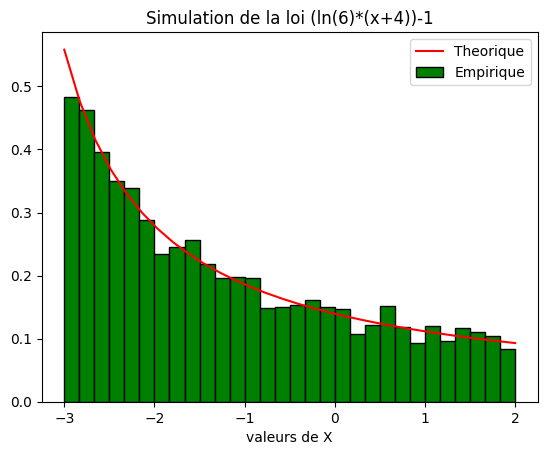

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# simulation de la loi de X par la methode d'inversion
a = -3
b = 2

# Version théorique de la VA X
axe = np.linspace(a,b,30)
theo = 1/(np.log(6)*(axe+4))    # TD formule de la fonction de densité
# f(x)= a/(X+4) = 1/(ln(6)*(x+4))   
plt.plot(axe,theo, label = 'Theorique', color = 'red')
plt.legend() 

# Simulation de Y qui suit une loi uniforme sur [0,1]
print("Y est la VA qui suit la loi uniforme sur [0,1]")
n = 5000
Y = np.random.rand(n)

# Definition de la VA X par la methode inverse
print("Simulation de X à l'aide de la méthode d'inversion :")
# Y = F(X) = (ln(X+4)/ln(6))              TD formule de repartition
# ln(6) * Y = ln(X+4)
# X + 4 = exp(ln(6)*Y)      
# X + 4 = exp(ln(6**Y))     <=> ln(a**b) = b*ln(a)
# X = 6**Y - 4
X = 6**Y - 4

hX_prob, binsX_prob, _ = plt.hist(X, bins=30, density=True, color = "green",edgecolor='black', label = 'Empirique')
plt.xlabel('valeurs de X')
plt.title('Simulation de la loi (ln(6)*(x+4))-1')
plt.legend()

# moyennes et ecarts types
print("La moyenne théorique Eth(X) = ", 5/np.log(6) - 4)    #d'après le td
print("La moyenne empirique Eemp(X) = ", np.mean(X))
print("L'ecart type théorique est oth(X) =", np.sqrt((5/np.log(6)*(3.5-(5/np.log(6))))))    #d'après le td
print("L'ecart type empirique est oemp(X) = = ", np.std(X))


### Question 2

Faire une simulation de la loi de probabilité continue définie par la densité : 

𝑓𝑋(𝑥)=1/4{ 𝑥,       si 𝑥 ∈[0,2[
    
               4−𝑥,    si 𝑥 ∈[2,4[

Se  reporter  à  la  section  2  du  chapitre  I

Indications :  on peut voir la variable  aléatoire 𝑋  comme  un ensemble  de  deux  variables aléatoires  𝑋1  et 𝑋2 : 
- l’une de densité 𝑥/4 sur  l’intervalle  [0,2]
- l’autre  de  densité  (4−𝑥)/4 sur  l’intervalle  [2,4]. 

Il faut donc déterminer l’expression de la fonction de répartition d’abord sur l’intervalle [0,2] et en déduire 𝑋1, puis sur l’intervalle [2,4] et en déduire 𝑋2. Pour finir, on calcule 𝑋 par concaténation de 𝑋1 et 𝑋2 (utiliser la fonction numpy.concatenate) 

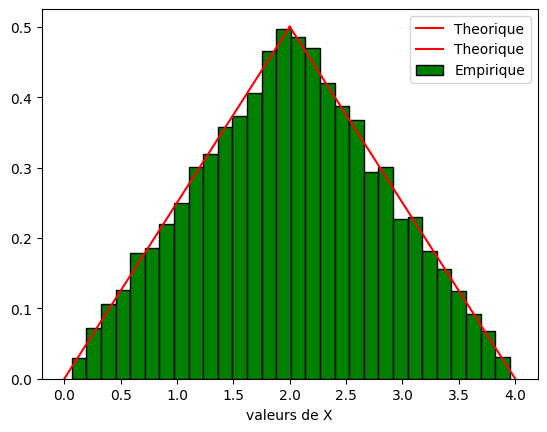

In [16]:
# Theorie
a = 0
b = 2
c = 4
axe1 = np.linspace(a,b)
axe2 = np.linspace(b,c)
X1theo = (1/4)*axe1     # enonce
X2theo = (4-axe2)/4
plt.plot(axe1,X1theo, label = 'Theorique', color = 'red')
plt.plot(axe2,X2theo, label = 'Theorique', color = 'red')
plt.legend() 

# Simulation de Y1 qui suit la loi uniforme sur [0,0.5]
Y1 = 0.5*np.random.rand(n)

# Simulation de Y1 qui suit la loi uniforme sur [0.5,1]
Y2 = np.random.rand(n)*0.5+0.5

# Definition de X1 et X2 par la methode inverse
# Y1 = FX(X1)
# Y1 = (1/8)*X1²     # cours
# 8Y1 = X1²
# X1 = sqrt(8Y1)
X1 = np.sqrt(8*Y1)
# Y2 = FX(X2)
# Y2 = -(1/8)*(X2²-8X2+8)
# -8Y2 = X2²-8X2 + 8
# -8Y2 = (X2 - 4)² - 8          <=> (X2² - 8X2 + 16) - 8   
# (X2 - 4)² = -8Y2 + 8          pour la racine on choisit la solution negative
# X2 - 4 = - sqrt(-8Y2 + 8)   
# X2 = 4 - sqrt(-8Y2 + 8)
X2 = 4 - np.sqrt(-8*Y2 + 8)

# Calcul de X par concatenation de X1 et X2
X = np.concatenate([X1,X2])

# affichage
hX_prob, binsX_prob, _ = plt.hist(X, bins=30, density=True, color = "green",edgecolor='black', label = 'Empirique')
plt.xlabel('valeurs de X')
plt.legend()
